## Netflix Exploratory Data Analysis

Data Source: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

### Import Neccesary Libraries

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats
import os
import math
import ast
import random

### Read in Data

In [181]:
df = pd.read_csv("C:\\Users\\Peter\\NetflixTitles.csv")

In [285]:
def bin_years_to_decade(year):
    return int(str(year)[0:-1]+"0")

df['decade'] = df['release_year'].map(bin_years_to_decade)

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decade
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN,1940
24,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,history,EG,NaN,tt0316472,6.8,231.0,1.826,5.8,1950
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,drama,EG,NaN,tt0044429,7.4,1219.0,1.866,7.0,1950
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,music,US,NaN,tt0047673,7.5,42373.0,9.710,7.2,1950
22,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,romance,EG,NaN,tt0049761,6.7,590.0,1.044,5.9,1950


In [183]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [185]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [186]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    if len(arr) == 0:
        return np.nan
    elif len(arr) == 1:
        return arr[0]
    else:
        return random.choice(arr)
    
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

In [187]:
def fig_size():
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(10)
    font = {'family' : 'normal','size' : 14}

### Movie Count vs TV Show Count on Netflix

<Figure size 1080x720 with 0 Axes>

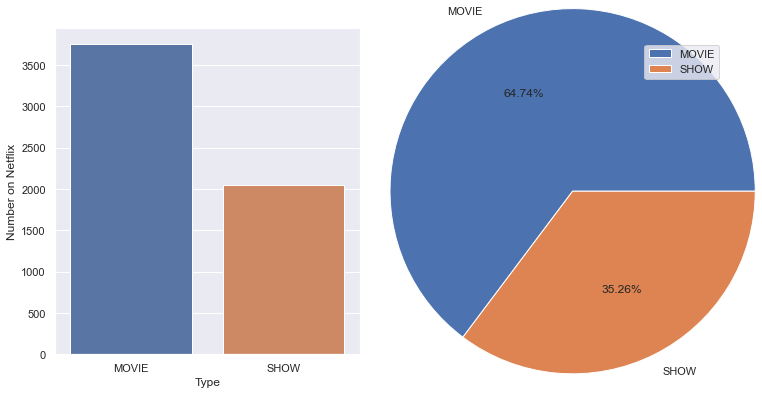

In [283]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})

fig_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(12,6))
a1=sns.barplot(x = types.type, y = types.counts, ax=axes[0])
a1.set(xlabel='Type', ylabel='Number on Netflix')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 , rotatelabels=False)
plt.legend()
plt.show()

### Genres on Netflix

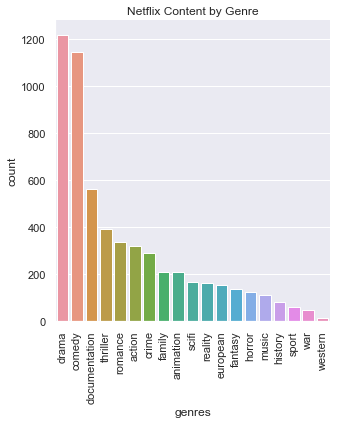

In [281]:
sns.catplot(x='genres', kind="count", data=df, order = df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Netflix Content by Genre')
plt.show()

### Age Certifications on Netflix

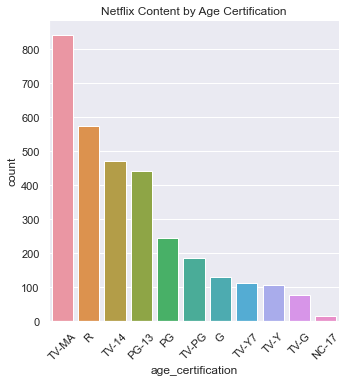

In [280]:
sns.catplot(x='age_certification', kind="count", data=df, order = df['age_certification'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Netflix Content by Age Certification')
plt.show()

### Genre Count by Age Certification

<AxesSubplot:xlabel='age_certification', ylabel='count'>

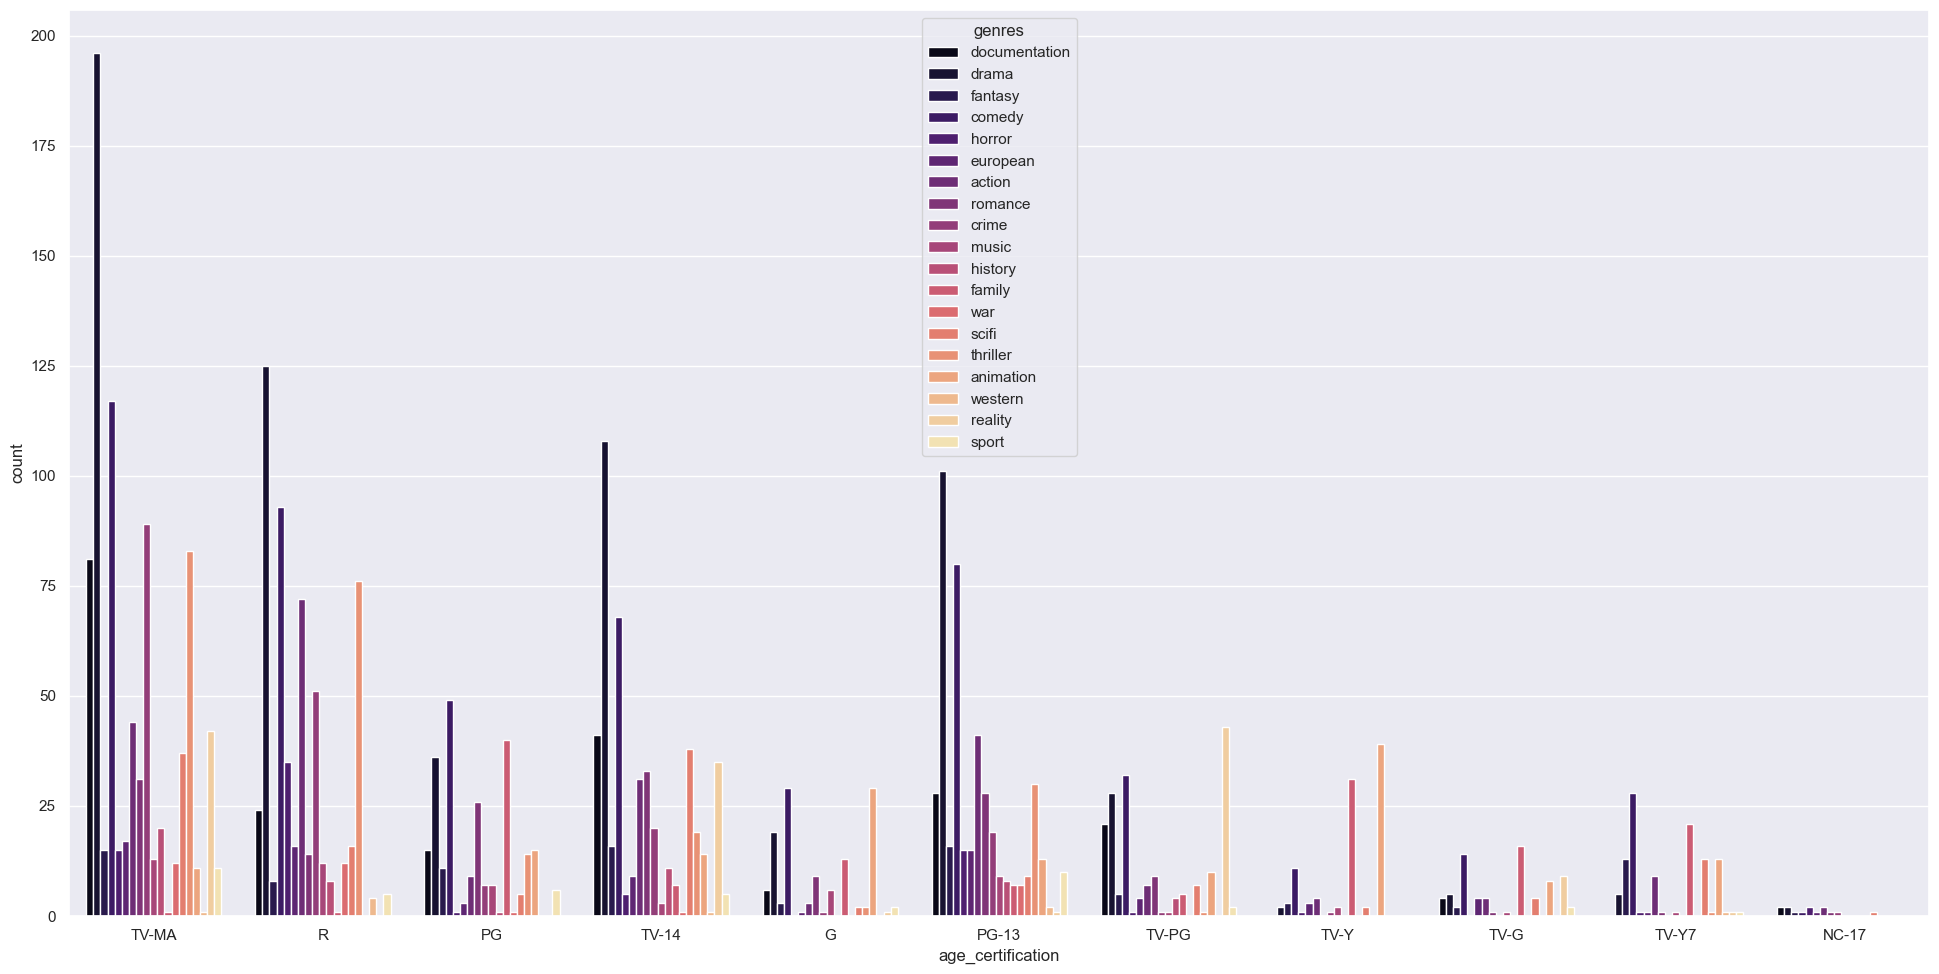

In [196]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')

### Netflix Content Release Dates

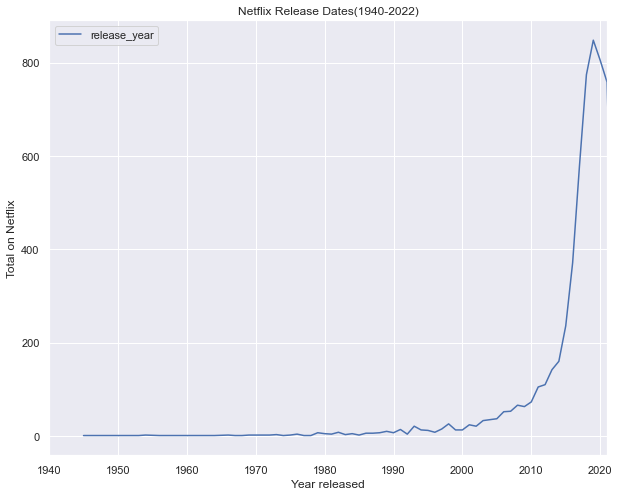

In [268]:
release_year_count= df.release_year.value_counts()
release_year_count = pd.DataFrame(release_year_count)

plt.figure(figsize=(10, 8))
sns.lineplot(data= release_year_count)
plt.title('Netflix Release Dates(1940-2022)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total on Netflix')
plt.show()

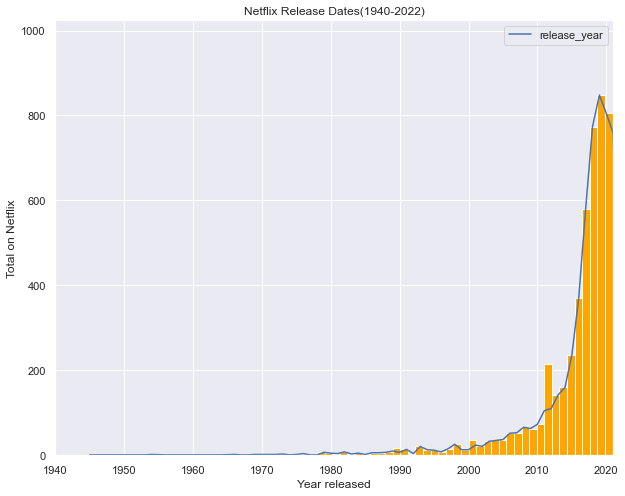

In [277]:
plt.figure(figsize=(10, 8))
plt.hist(df.release_year,bins =70,color='orange' )
plt.title('Netflix Release Dates(1940-2022)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total on Netflix')
sns.lineplot(data= release_year_count)
plt.show()

### Netflix Content Production Countries

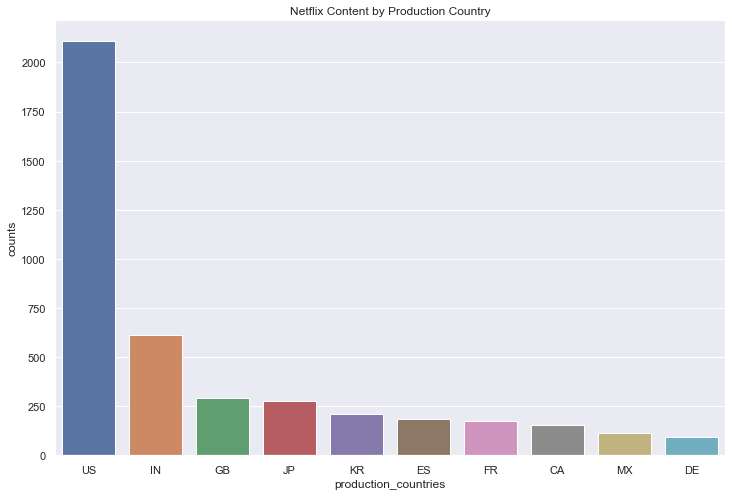

In [278]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})

plt.figure(figsize=(12, 8))
sns.barplot(x = countries.production_countries[:10],y = countries.counts[:10]);
plt.title('Netflix Content by Production Country')
plt.show()

### IMDB vs TMDB Score

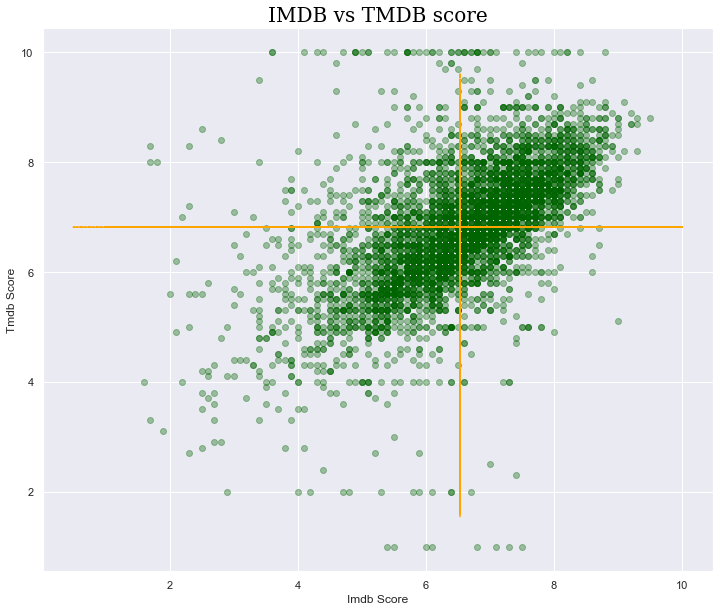

In [279]:
plt.figure(figsize =(12,10))

x_line =[np.mean(df.imdb_score)]*len(df.tmdb_score)     
y_line =[np.mean(df.tmdb_score)]*len(df.imdb_score)
plt.plot(x_line,df.imdb_score, label='Mean', linestyle='--',c ="orange")
plt.plot(df.tmdb_score,y_line, label='Mean', linestyle='--',c ="orange")

plt.xlabel("Imdb Score")
plt.ylabel("Tmdb Score")
plt.scatter(x=df.imdb_score, y=df.tmdb_score,c ="darkgreen",alpha = 0.35,marker ="o")

font = {'family': 'serif','color':  'black','weight': 'normal','size': 20 }
plt.title("IMDB vs TMDB score",fontdict=font)

plt.show()

### IMDB Score by Year Released

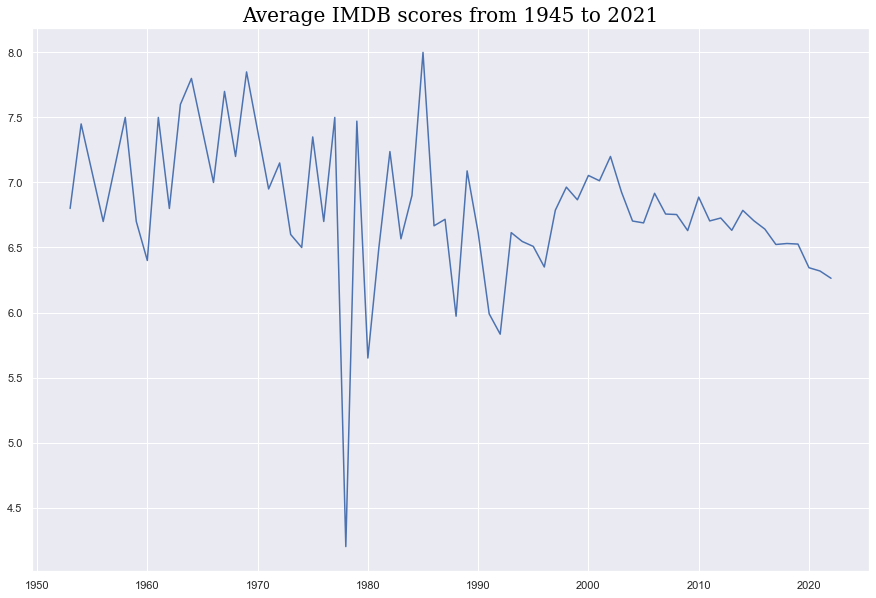

In [284]:
df = df.sort_values("release_year")
imdb_year_df=df[['release_year','imdb_score']]
imdb_year_df = imdb_year_df.groupby('release_year')[["imdb_score"]].mean()

font = {'family': 'serif','color':  'black','weight': 'normal','size': 20 }

plt.figure(figsize = (15,10))
plt.title("Average IMDB scores from 1945 to 2021",fontdict=font)
plt.plot(imdb_year_df)

### Runtime vs Decade and Age Certification

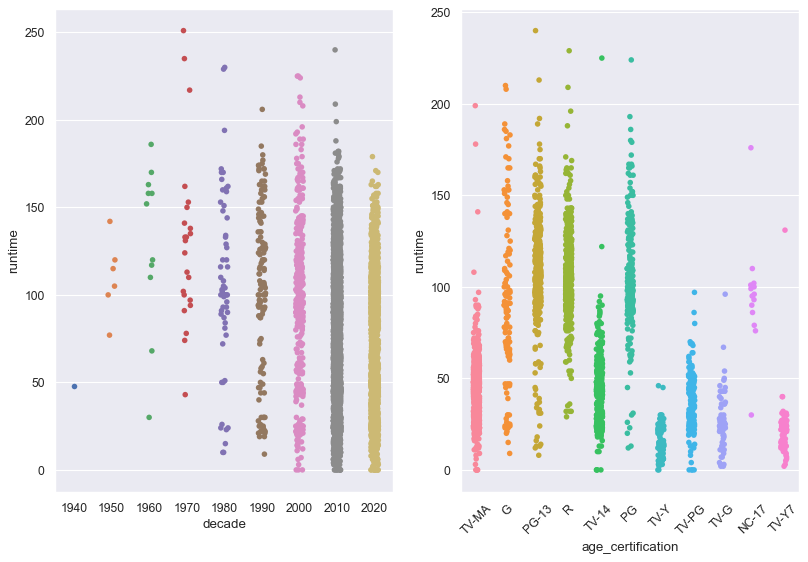

In [291]:
fig, ax = plt.subplots(1,2, figsize=(12,8), dpi= 80)    
a1=sns.stripplot(x=df.decade, y=df.runtime, ax=ax[0])
a2=sns.stripplot(x=df.age_certification, y=df.runtime, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

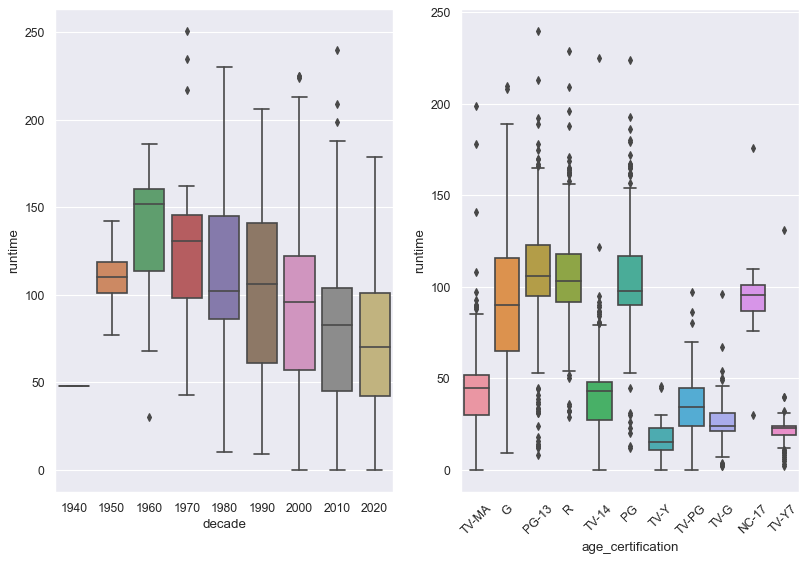

In [292]:
fig, ax = plt.subplots(1,2, figsize=(12,8), dpi= 80)    
a1=sns.boxplot(x=df.decade, y=df.runtime, ax=ax[0])
a2=sns.boxplot(x=df.age_certification, y=df.runtime, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

### Correlation Heat Map for Netflix

<AxesSubplot:>

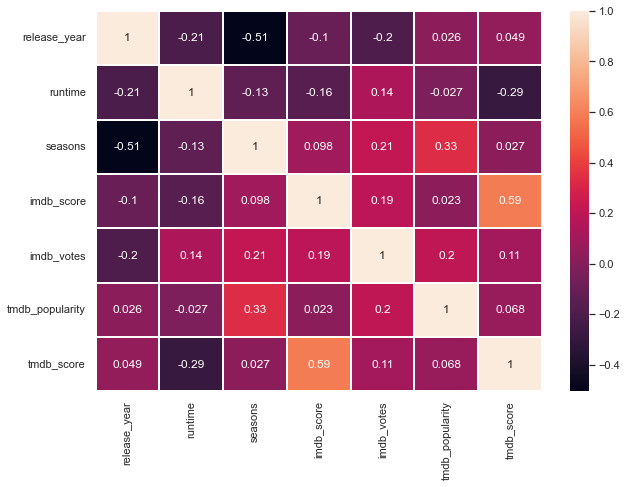

In [218]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), annot = True, linewidths = 0.05)

### Pairplot for Netflix Data

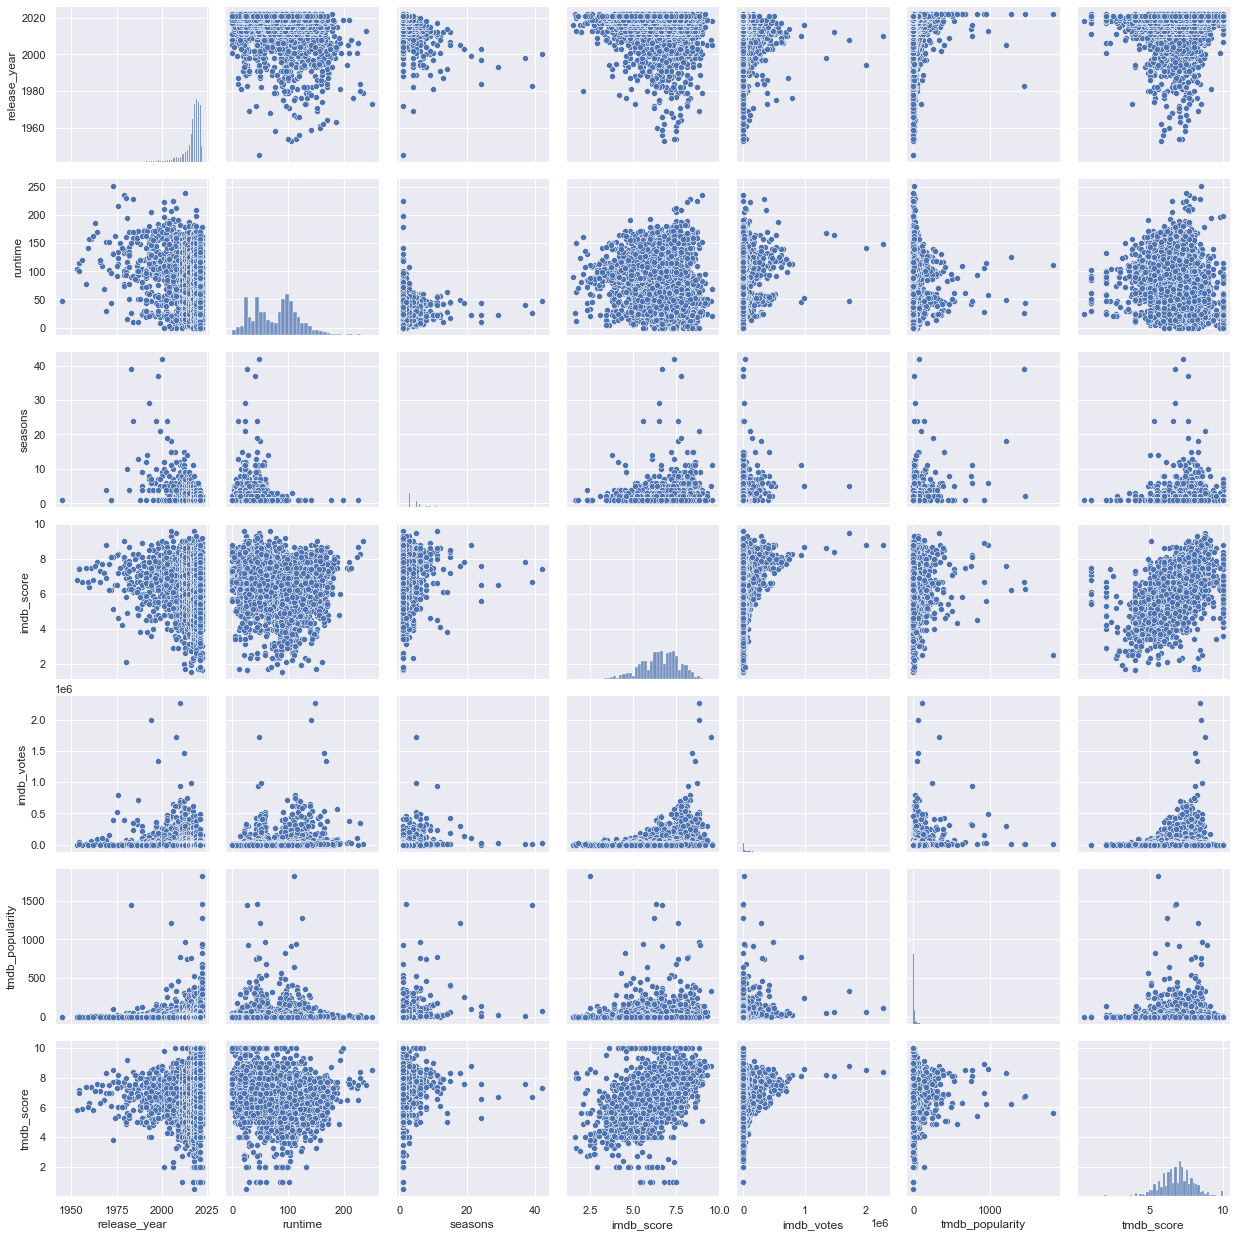

In [193]:
sns.pairplot(df)